# Urban API

In [1]:
from idu_clients import UrbanAPI

urban_api = UrbanAPI('http://10.32.1.107:5300')

## Проверить работоспособность API

In [2]:
await urban_api.is_alive()

True

## Забрать геометрии регионов

In [3]:
regions = await urban_api.get_regions()
regions.head(3)

,geometry,territory_type,parent_id,name,level,properties,admin_center,okato_code,created_at,updated_at
territory_id,,,,,,,,,,
1,"MULTIPOLYGON (((34.32572 59.19331, 34.32541 59...","{'territory_type_id': 1, 'name': 'Субъект Феде...",12639,Ленинградская область,2,"{'Малые города': 15, 'Крупные города': 0, 'Вуз...",None,41000000000,2024-06-16T21:35:40.801621Z,2024-06-16T21:35:40.801621Z
3138,"MULTIPOLYGON (((29.42576 60.19074, 29.42719 60...","{'territory_type_id': 1, 'name': 'Субъект Феде...",12639,Санкт-Петербург,2,"{'Малые города': 10, 'Крупные города': 0, 'Чис...",None,40000000000,2024-06-16T21:35:40.801621Z,2024-06-16T21:35:40.801621Z
3268,"MULTIPOLYGON (((36.8031 55.44083, 36.81136 55....","{'territory_type_id': 1, 'name': 'Субъект Феде...",12639,Москва,2,"{'Малые города': 16, 'Крупные города': 1, 'Чис...",None,45000000000,2024-06-16T21:35:40.801621Z,2024-06-16T21:35:40.801621Z


## Забрать типы территорий

In [4]:
territory_types = await urban_api.get_territory_types()
territory_types.head()

,name
territory_type_id,
1,Субъект Федерации
2,Муниципальное образование
3,Поселение
4,Город
5,Городской поселок


## Забрать территории для региона

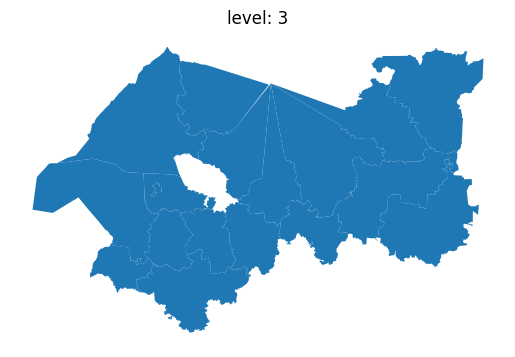

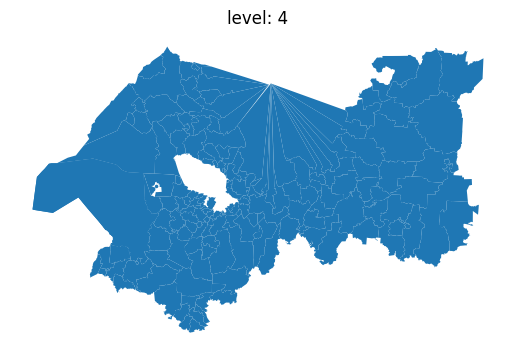

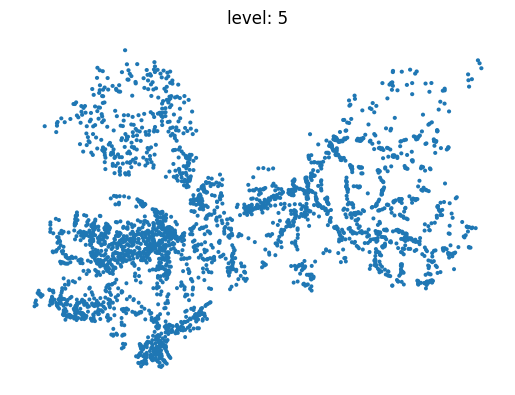

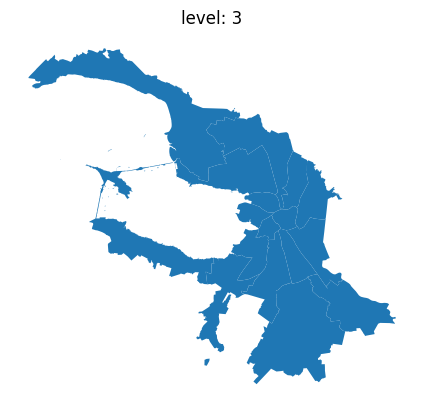

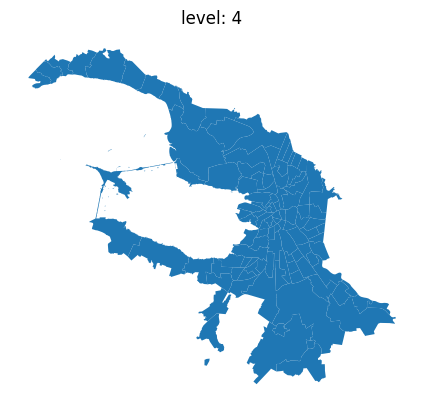

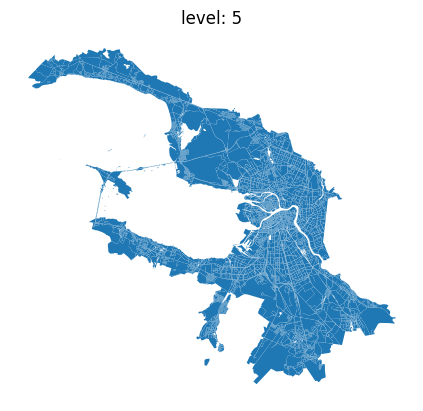

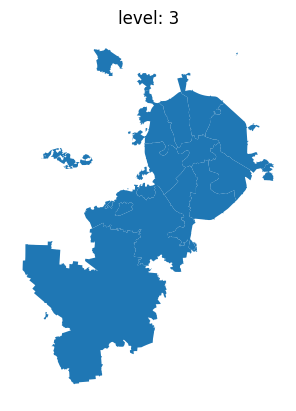

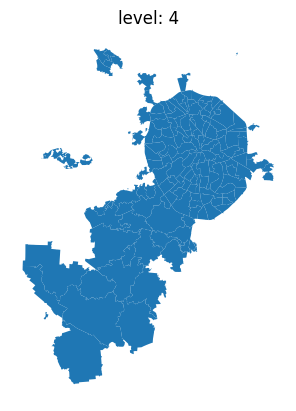

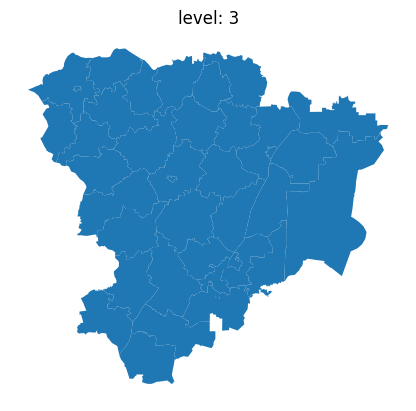

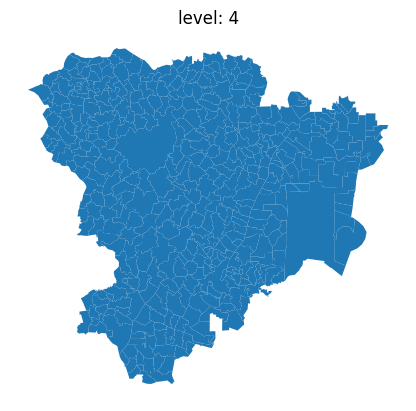

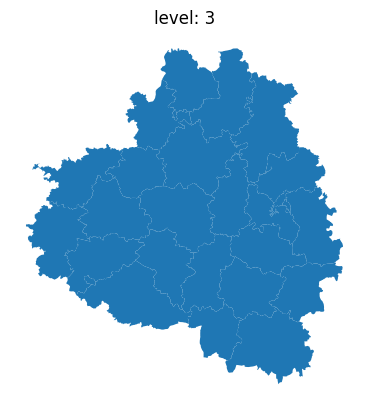

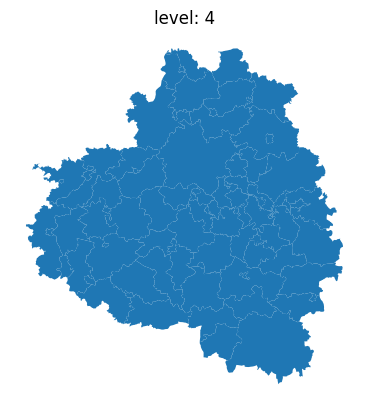

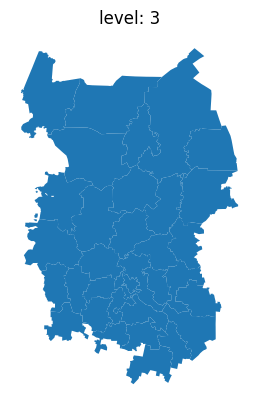

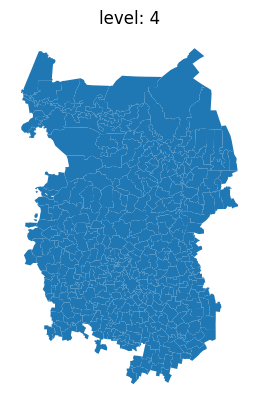

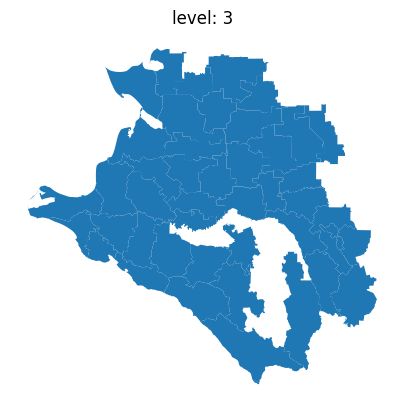

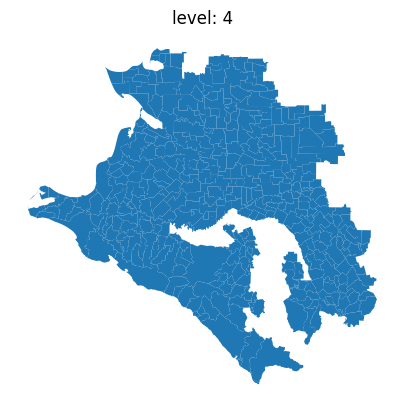

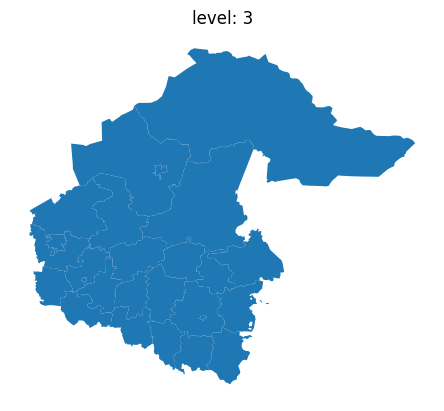

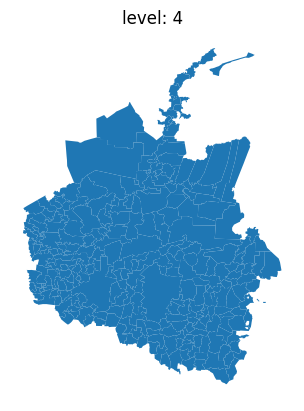

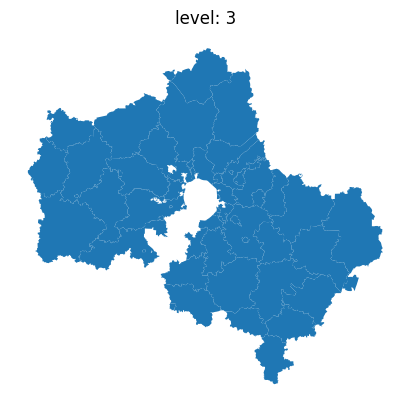

In [6]:
for region_id in regions.index:
  gdfs_dict = await urban_api.get_region_territories(region_id)
  for level, gdf in gdfs_dict.items():
    ax = gdf.plot()
    ax.set_title(f'level: {level}')
    ax.set_axis_off()

## 